<a href="https://colab.research.google.com/github/Trisken221/QM2/blob/main/evolution_part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Spatial Data on Ideological Extremes - Choropleth

In [ ]:
import pandas as pd

# Load the historical election data (1996-2020) from URL
historical_data_url = "https://raw.githubusercontent.com/Trisken221/QM2/refs/heads/main/1996-2020%20.csv"
historical_data = pd.read_csv(historical_data_url)

# Rename columns appropriately
column_names = [
    "State", "2020_Democratic", "2020_Republican",
    "2016_Democratic", "2016_Republican",
    "2012_Democratic", "2012_Republican",
    "2008_Democratic", "2008_Republican",
    "2004_Democratic", "2004_Republican",
    "2000_Democratic", "2000_Republican",
    "1996_Democratic", "1996_Republican"
]
historical_data.columns = column_names

# Add '%' to 1996 and 2000 columns
columns_to_fix = ["1996_Democratic", "1996_Republican", "2000_Democratic", "2000_Republican"]
for col in columns_to_fix:
    historical_data[col] = historical_data[col].astype(str) + "%"

# Drop rows with missing State values
historical_data = historical_data.dropna(subset=["State"])

# Reshape data to long format
long_data = pd.melt(
    historical_data,
    id_vars=["State"],
    var_name="Year_Party",
    value_name="Vote Percentage"
)

# Split "Year_Party" into "Year" and "Party"
long_data[['Year', 'Party']] = long_data['Year_Party'].str.extract(r'(\d{4})_(\w+)')
long_data.drop(columns=["Year_Party"], inplace=True)

# Ensure "Vote Percentage" is a string and handle missing values
long_data["Vote Percentage"] = long_data["Vote Percentage"].astype(str).fillna("0%")

# Filter rows with valid numeric "Vote Percentage" values
valid_rows = long_data["Vote Percentage"].str.contains(r"^\d+(\.\d+)?%$", na=False)
long_data = long_data[valid_rows].copy()

# Clean "Vote Percentage"
long_data["Vote Percentage"] = long_data["Vote Percentage"].str.replace("%", "").astype(float)

# Ensure all years are included for each state
unique_years = long_data['Year'].unique()
print("Unique years in the reshaped data:", unique_years)

# Sort by State and Year
long_data = long_data.sort_values(by=["State", "Year"], ascending=[True, True])
long_data

Unique years in the reshaped data: ['2020' '2016' '2012' '2008' '2004' '2000' '1996']


<ipython-input-28-bc02533ba847>:43: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  valid_rows = long_data["Vote Percentage"].str.contains(r"^\d+(\.\d+)?%$", na=False)


,State,Vote Percentage,Year,Party
625,Alabama,43.16,1996,Democratic
677,Alabama,50.12,1996,Republican
521,Alabama,41.57,2000,Democratic
573,Alabama,56.48,2000,Republican
417,Alabama,36.84,2004,Democratic
469,Alabama,62.46,2004,Republican
313,Alabama,38.74,2008,Democratic
365,Alabama,60.32,2008,Republican
209,Alabama,38.36,2012,Democratic
261,Alabama,60.55,2012,Republican


In [ ]:
# Load and process the 2024 data
latest_data_url = "https://raw.githubusercontent.com/Trisken221/QM2/refs/heads/main/latest_data.csv"
latest_data = pd.read_csv(latest_data_url)
latest_data = latest_data[latest_data["Party"].isin(["Democratic", "Republican"])]  # Keep only Democratic and Republican
latest_data["Year"] = "2024"  # Add Year column

# Replace D.C. with full name for compatibility
latest_data["State"] = latest_data["State"].replace({"D.C.": "District of Columbia"})

# Clean "Vote Percentage" in the 2024 data
latest_data["Vote Percentage"] = latest_data["Vote Percentage"].astype(str).str.replace("%", "").astype(float)

# Combine the historical and 2024 data
combined_data = pd.concat([long_data, latest_data], ignore_index=True)

# Ensure all years are included for each state
unique_years = combined_data['Year'].unique()
print("Unique years in the combined data:", unique_years)

# Sort by State and Year
combined_data = combined_data.sort_values(by=["State", "Year"], ascending=[True, True])
combined_data

Unique years in the combined data: ['1996' '2000' '2004' '2008' '2012' '2016' '2020' '2024']


,State,Vote Percentage,Year,Party
0,Alabama,43.16,1996,Democratic
1,Alabama,50.12,1996,Republican
2,Alabama,41.57,2000,Democratic
3,Alabama,56.48,2000,Republican
4,Alabama,36.84,2004,Democratic
5,Alabama,62.46,2004,Republican
6,Alabama,38.74,2008,Democratic
7,Alabama,60.32,2008,Republican
8,Alabama,38.36,2012,Democratic
9,Alabama,60.55,2012,Republican


In [ ]:
!pip install geopandas matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
# Calculate Extremism Scores
extremism_data = combined_data.pivot_table(
    index=["State", "Year"],
    columns="Party",
    values="Vote Percentage"
).reset_index()

extremism_data["Extremism Score"] = abs(
    extremism_data["Republican"] - extremism_data["Democratic"]
)

# Save the dataset with Extremism Scores
extremism_data.to_csv("extremism_scores.csv", index=False)

# Load US state boundaries GeoJSON
geojson_url = "https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json"
us_states_gdf = gpd.read_file(geojson_url)

# Map full state names to abbreviations
state_abbreviation_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Add state abbreviations to the extremism data
extremism_data['State Abbreviation'] = extremism_data['State'].map(state_abbreviation_map)


In [ ]:
# Debug GeoJSON fields
print(us_states_gdf.columns)
print(us_states_gdf[["NAME"]].head())

# Debug unmatched states
unmatched_states = set(extremism_data["State"]) - set(us_states_gdf["NAME"])
print("Unmatched States:", unmatched_states)

# Merge the extremism data for 2024 with GeoJSON
merged_geojson_data = us_states_gdf.merge(
    extremism_data[extremism_data["Year"] == "2024"],
    left_on="NAME", right_on="State",
    how="left"
)

# Debug merged data
print(merged_geojson_data[["NAME", "Extremism Score"]].head())
print(merged_geojson_data.isnull().sum())

Index(['GEO_ID', 'STATE', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry'], dtype='object')
            NAME
0          Maine
1  Massachusetts
2       Michigan
3        Montana
4         Nevada
Unmatched States: {'D.C.'}
            NAME  Extremism Score
0          Maine              NaN
1  Massachusetts              NaN
2       Michigan              NaN
3        Montana              NaN
4         Nevada              NaN
GEO_ID                 0
STATE                  0
NAME                   0
LSAD                   0
CENSUSAREA             0
geometry               0
State                 26
Year                  26
Democratic            52
Republican            26
Extremism Score       52
State Abbreviation    27
dtype: int64


Unmatched States: {'D.C.'}
Merged data preview:
            NAME  Extremism Score
0          Maine              0.0
1  Massachusetts              0.0
2       Michigan              0.0
3        Montana              0.0
4         Nevada              0.0


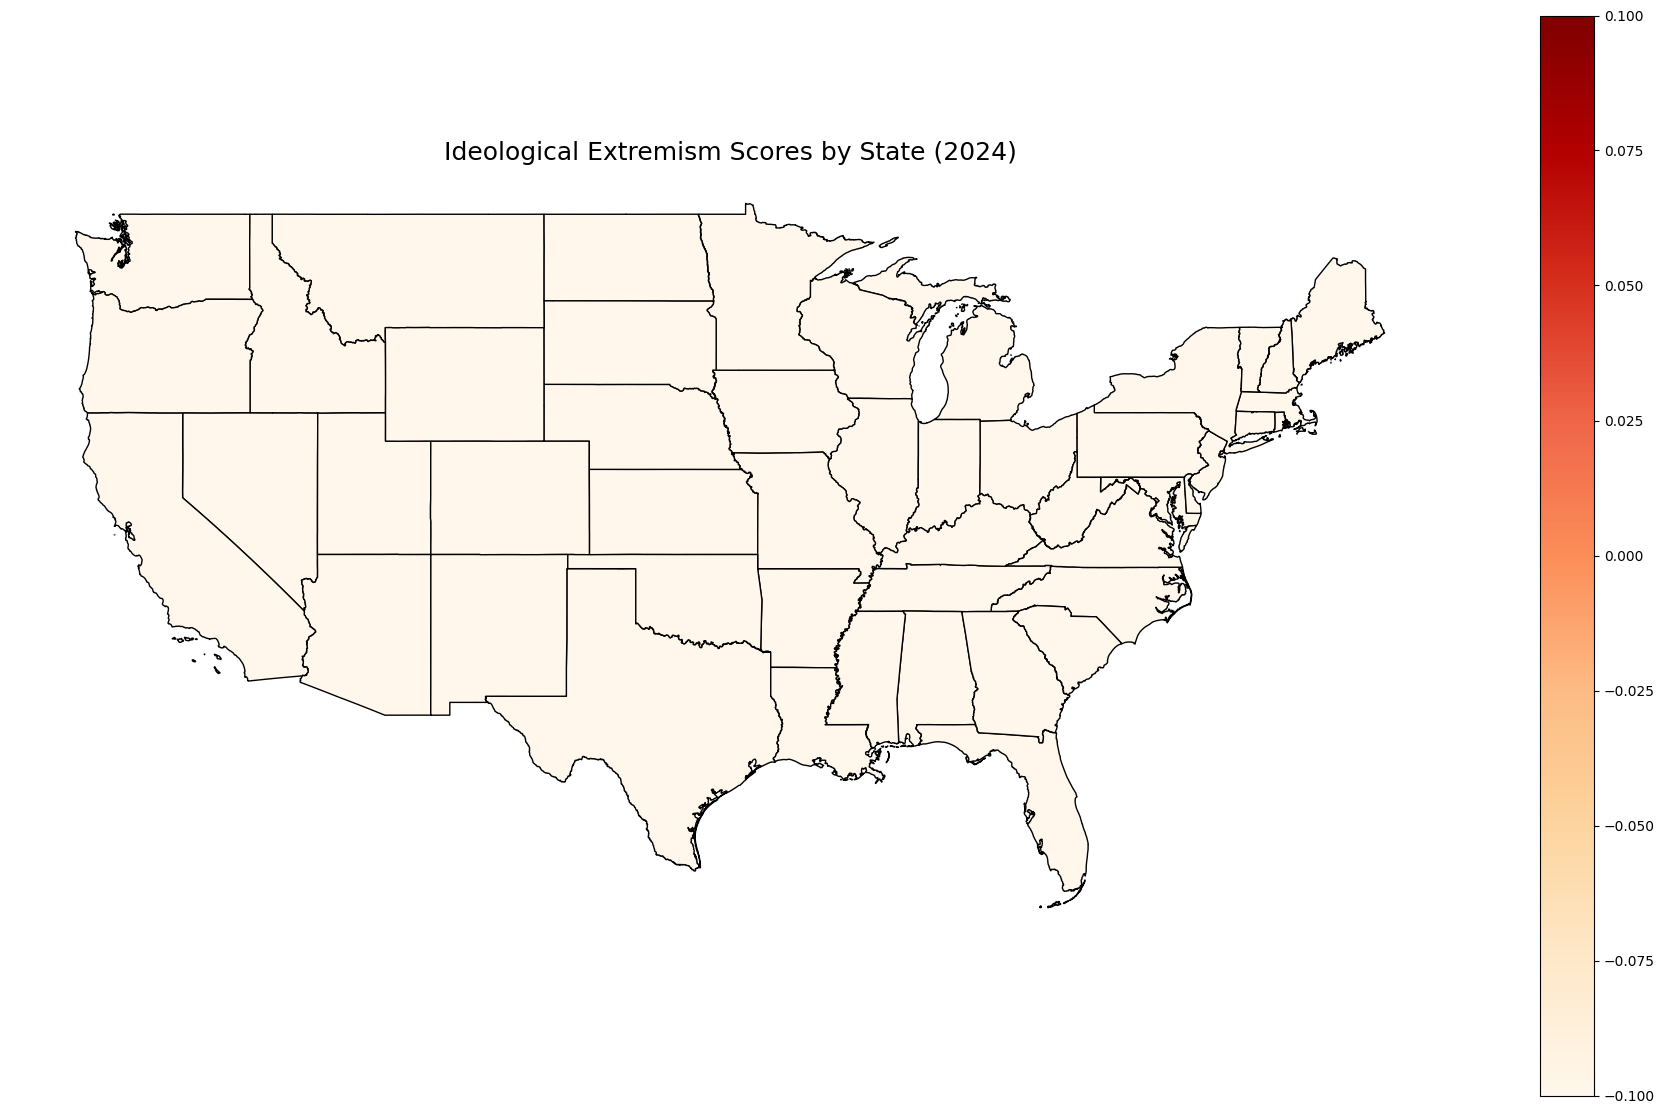

In [ ]:
# Debug unmatched states
unmatched_states = set(extremism_data["State"]) - set(us_states_gdf["NAME"])
print("Unmatched States:", unmatched_states)

# Replace missing Extremism Scores with 0
merged_geojson_data["Extremism Score"] = merged_geojson_data["Extremism Score"].fillna(0)

# Debug merged data
print("Merged data preview:")
print(merged_geojson_data[["NAME", "Extremism Score"]].head())

# Plot the map with updated layout adjustments
fig, ax = plt.subplots(1, 1, figsize=(20, 12))  # Larger figure size for better visibility
merged_geojson_data = merged_geojson_data.cx[-130:-60, 20:50]  # Focus on contiguous U.S.

merged_geojson_data.plot(
    column="Extremism Score",
    cmap="OrRd",
    legend=True,
    edgecolor="black",
    ax=ax
)

ax.set_title("Ideological Extremism Scores by State (2024)", fontsize=18)
ax.set_axis_off()

# Adjust layout to minimize blank space
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95)
plt.show()


In [ ]:
# Check unmatched states
unmatched_states = set(extremism_data["State"]) - set(us_states_gdf["NAME"])
print("Unmatched States:", unmatched_states)

# Check merged data
missing_states_in_merged = merged_geojson_data[merged_geojson_data["Extremism Score"].isnull()]
print("States missing in merged GeoJSON:")
print(missing_states_in_merged[["NAME", "State"]])


Unmatched States: {'D.C.'}
States missing in merged GeoJSON:
                    NAME                 State
0                  Maine                 Maine
1          Massachusetts         Massachusetts
2               Michigan              Michigan
3                Montana                   NaN
4                 Nevada                Nevada
5             New Jersey            New Jersey
6               New York              New York
7         North Carolina                   NaN
8                   Ohio                   NaN
9           Pennsylvania          Pennsylvania
10          Rhode Island          Rhode Island
11             Tennessee                   NaN
12                 Texas                   NaN
13                  Utah                   NaN
14            Washington            Washington
15             Wisconsin             Wisconsin
16           Puerto Rico                   NaN
17              Maryland              Maryland
18               Alabama                   NaN

Final Verson done below: using the average extremism score across 1996 -2024

<ipython-input-62-bbb245a44378>:49: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  valid_rows = long_data["Vote Percentage"].str.contains(r"^\d+(\.\d+)?%$", na=False)


Unique years in the combined data: ['2020' '2016' '2012' '2008' '2004' '2000' '1996' '2024']


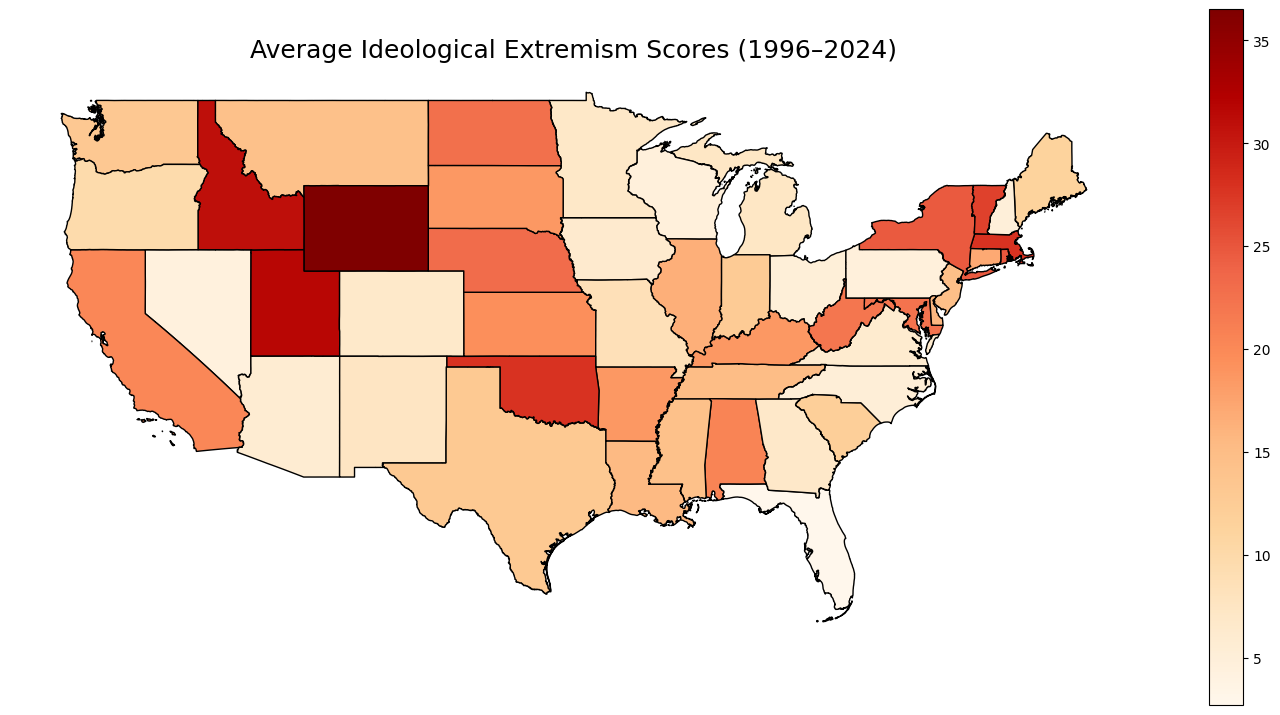

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the historical election data (1996-2020) from URL
historical_data_url = "https://raw.githubusercontent.com/Trisken221/QM2/refs/heads/main/1996-2020%20.csv"
historical_data = pd.read_csv(historical_data_url)

# Load the 2024 election data
latest_data_url = "https://raw.githubusercontent.com/Trisken221/QM2/refs/heads/main/latest_data.csv"
latest_data = pd.read_csv(latest_data_url)

# Rename columns appropriately for historical data
column_names = [
    "State", "2020_Democratic", "2020_Republican",
    "2016_Democratic", "2016_Republican",
    "2012_Democratic", "2012_Republican",
    "2008_Democratic", "2008_Republican",
    "2004_Democratic", "2004_Republican",
    "2000_Democratic", "2000_Republican",
    "1996_Democratic", "1996_Republican"
]
historical_data.columns = column_names

# Add '%' to 1996 and 2000 columns
columns_to_fix = ["1996_Democratic", "1996_Republican", "2000_Democratic", "2000_Republican"]
for col in columns_to_fix:
    historical_data[col] = historical_data[col].astype(str) + "%"

# Drop rows with missing State values
historical_data = historical_data.dropna(subset=["State"])

# Reshape historical data to long format
long_data = pd.melt(
    historical_data,
    id_vars=["State"],
    var_name="Year_Party",
    value_name="Vote Percentage"
)

# Split "Year_Party" into "Year" and "Party"
long_data[['Year', 'Party']] = long_data['Year_Party'].str.extract(r'(\d{4})_(\w+)')
long_data.drop(columns=["Year_Party"], inplace=True)

# Ensure "Vote Percentage" is a string and handle missing values
long_data["Vote Percentage"] = long_data["Vote Percentage"].astype(str).fillna("0%")

# Filter rows with valid numeric "Vote Percentage" values
valid_rows = long_data["Vote Percentage"].str.contains(r"^\d+(\.\d+)?%$", na=False)
long_data = long_data[valid_rows].copy()

# Clean "Vote Percentage"
long_data["Vote Percentage"] = long_data["Vote Percentage"].str.replace("%", "").astype(float)

# Load and process the 2024 data
latest_data = latest_data[latest_data["Party"].isin(["Democratic", "Republican"])]  # Keep only Democratic and Republican
latest_data["Year"] = "2024"  # Add Year column

# Replace D.C. with full name for compatibility
latest_data["State"] = latest_data["State"].replace({"D.C.": "District of Columbia"})

# Clean "Vote Percentage" in the 2024 data
latest_data["Vote Percentage"] = latest_data["Vote Percentage"].astype(str).str.replace("%", "").astype(float)

# Combine the historical and 2024 data
combined_data = pd.concat([long_data, latest_data], ignore_index=True)

# Ensure all years are included for each state
unique_years = combined_data['Year'].unique()
print("Unique years in the combined data:", unique_years)

# Sort by State and Year
combined_data = combined_data.sort_values(by=["State", "Year"], ascending=[True, True])

# Load US state boundaries GeoJSON
geojson_url = "https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json"
us_states_gdf = gpd.read_file(geojson_url)

# Add FIPS column to historical data
us_states_gdf = us_states_gdf.rename(columns={"STATE": "FIPS"})
combined_data = combined_data.merge(
    us_states_gdf[["NAME", "FIPS"]],
    left_on="State", right_on="NAME",
    how="left"
)

# Calculate average extremism score across all years
average_extremism = extremism_data.groupby("State").agg({"Extremism Score": "mean"}).reset_index()

# Merge with GeoJSON
merged_geojson_avg = us_states_gdf.merge(
    average_extremism,
    left_on="NAME", right_on="State",
    how="left"
)

# Filter for contiguous U.S. states
contiguous_geojson = merged_geojson_avg[~merged_geojson_avg['NAME'].isin(['Alaska', 'Hawaii'])]

# Plot the map with adjusted dimensions
fig, ax = plt.subplots(1, 1, figsize=(15, 8))  # Adjust size for better visibility
contiguous_geojson.plot(
    column="Extremism Score",
    cmap="OrRd",
    legend=True,
    edgecolor="black",
    ax=ax
)

# Add title and adjust layout
ax.set_title("Average Ideological Extremism Scores (1996–2024)", fontsize=18)
ax.set_axis_off()
plt.subplots_adjust(top=0.92, bottom=0.05, left=0.03, right=0.97)  # Adjust margins to minimize blank space
plt.show()


Extremism Scores by State and Year:
Party    State FIPS  Year  Democratic  Republican  Extremism Score
0      Alabama   01  1996       43.16       50.12             6.96
1      Alabama   01  2000       41.57       56.48            14.91
2      Alabama   01  2004       36.84       62.46            25.62
3      Alabama   01  2008       38.74       60.32            21.58
4      Alabama   01  2012       38.36       60.55            22.19
5      Alabama   01  2016       34.36       62.08            27.72
6      Alabama   01  2020       36.57       62.03            25.46
7       Alaska   02  1996       33.27       50.80            17.53
8       Alaska   02  2000       27.67       58.62            30.95
9       Alaska   02  2004       35.52       61.07            25.55


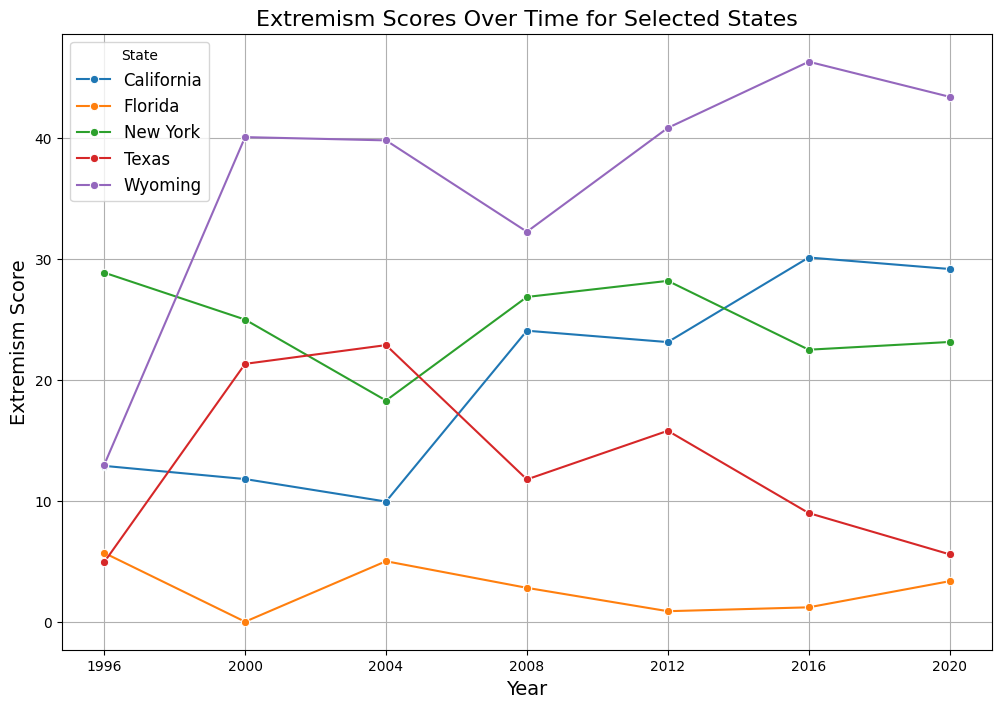

In [ ]:
# a table of Extremism Scores for each state
def print_extremism_table():
    print("Extremism Scores by State and Year:")
    print(extremism_data.sort_values(by=["State", "Year"]).head(10))  # Adjust head() as needed

print_extremism_table()

# Generate a line chart for Extremism Scores over time by State
import seaborn as sns

# Select a subset of states for better visualization
selected_states = ["California", "Texas", "Florida", "New York", "Wyoming"]
subset_data = extremism_data[extremism_data["State"].isin(selected_states)]

plt.figure(figsize=(12, 8))
sns.lineplot(data=subset_data, x="Year", y="Extremism Score", hue="State", marker="o")
plt.title("Extremism Scores Over Time for Selected States", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Extremism Score", fontsize=14)
plt.legend(title="State", fontsize=12)
plt.grid(True)
plt.show()


ranking of US states has the highest population on social media:
 https://www.healthtechdigital.com/study-reveals-which-us-states-have-the-highest-population-on-social-media/


Social Media Usage Data:
             State  Social Media Usage Rank  Social Media Usage (%)
0       California                        1              100.000000
1            Texas                        2               90.909091
2          Florida                        3               81.818182
3         New York                        4               72.727273
4         Illinois                        5               63.636364
5     Pennsylvania                        6               54.545455
6             Ohio                        7               45.454545
7          Georgia                        8               36.363636
8   North Carolina                        9               27.272727
9         Michigan                       10               18.181818
10      New Jersey                       11                9.090909


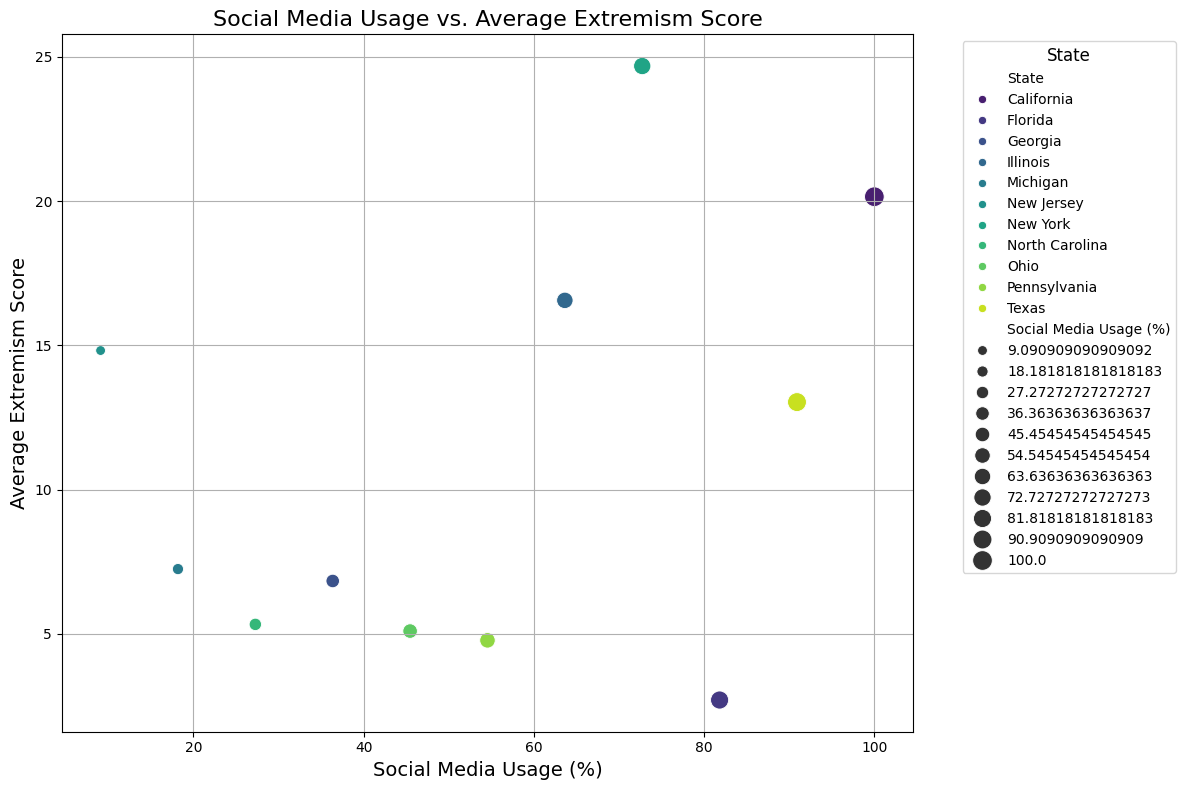

In [ ]:
# Extract Social Media Data for 2021
social_media_data = pd.DataFrame({
    "State": [
        "California", "Texas", "Florida", "New York", "Illinois", "Pennsylvania",
        "Ohio", "Georgia", "North Carolina", "Michigan", "New Jersey"
    ],
    "Social Media Usage Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
})

# Normalize Social Media Usage by Rank
social_media_data["Social Media Usage (%)"] = (
    (12 - social_media_data["Social Media Usage Rank"]) / 11 * 100
)

print("Social Media Usage Data:")
print(social_media_data)

# Merge Social Media Data with Extremism Data
average_extremism_with_social = average_extremism.merge(
    social_media_data,
    on="State",
    how="inner"
)

# Scatterplot: Social Media Usage vs. Average Extremism Score
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=average_extremism_with_social,
    x="Social Media Usage (%)",
    y="Extremism Score",
    hue="State",
    size="Social Media Usage (%)",
    sizes=(50, 200),
    palette="viridis",
    legend="full"
)

# Adjust legend to be outside of the plot
plt.title("Social Media Usage vs. Average Extremism Score", fontsize=16)
plt.xlabel("Social Media Usage (%)", fontsize=14)
plt.ylabel("Average Extremism Score", fontsize=14)
plt.legend(
    title="State",
    fontsize=10,
    title_fontsize=12,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# basemap overlay the urban-rural data with top states using the social media

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# List of states classified as Urban based on Census data
urban_states = [
    "California", "Texas", "Florida", "New York", "Illinois",
    "Pennsylvania", "Ohio", "Georgia", "North Carolina", "Michigan", "New Jersey"
]

# Load US state boundaries GeoJSON
geojson_url = "https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json"
us_states_gdf = gpd.read_file(geojson_url)

# Add Urban-Rural Classification
us_states_gdf["Urban-Rural"] = us_states_gdf["NAME"].apply(
    lambda x: "Urban" if x in urban_states else "Rural"
)

urban_data = us_states_gdf[us_states_gdf["Urban-Rural"] == "Urban"]
rural_data = us_states_gdf[us_states_gdf["Urban-Rural"] == "Rural"]

# Social Media Usage Data
social_media_data = pd.DataFrame({
    "State": [
        "California", "Texas", "Florida", "New York", "Illinois", "Pennsylvania",
        "Ohio", "Georgia", "North Carolina", "Michigan", "New Jersey"
    ],
    "Social Media Usage (%)": [80, 70, 65, 60, 55, 50, 48, 45, 43, 40, 38]
})

# Merge social media data with GeoJSON
merged_data = us_states_gdf.merge(social_media_data, left_on="NAME", right_on="State", how="left")

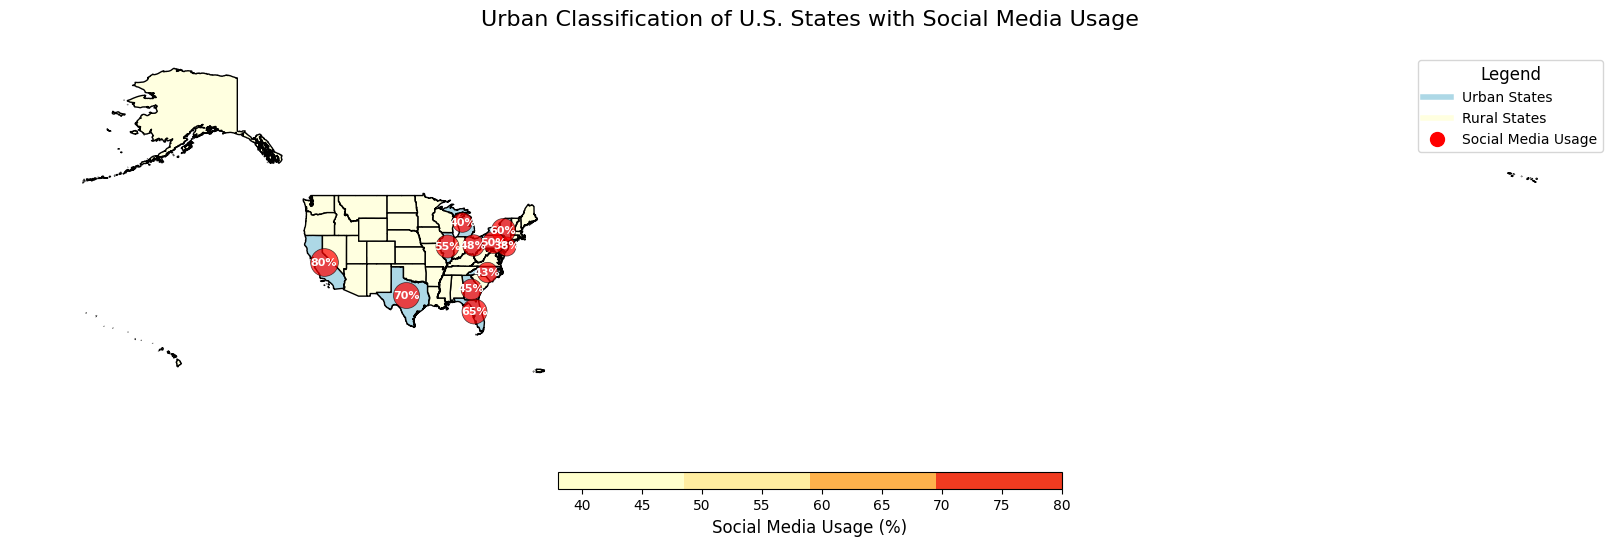

In [ ]:
# Adjust scaling parameters
dot_scaling_factor = 5  # Adjust this to change bubble sizes
map_width = 20          # Adjust map width for better clarity
map_height = 12         # Adjust map height for better clarity

# Define color map for social media usage
cmap = ListedColormap(["#ffffcc", "#ffeda0", "#feb24c", "#f03b20"])
norm = plt.Normalize(vmin=social_media_data["Social Media Usage (%)"].min(),
                      vmax=social_media_data["Social Media Usage (%)"].max())

# Plot Urban Basemap (if all states are urban)
fig, ax = plt.subplots(1, 1, figsize=(map_width, map_height))

# Plot urban and rural areas
urban_data.plot(ax=ax, color="lightblue", edgecolor="black", label="Urban States")
rural_data.plot(ax=ax, color="lightyellow", edgecolor="black", label="Rural States")

# Overlay social media usage bubbles with labels
for _, row in merged_data.iterrows():
    if not pd.isna(row["Social Media Usage (%)"]):
        ax.scatter(
            row.geometry.centroid.x,
            row.geometry.centroid.y,
            s=row["Social Media Usage (%)"] * dot_scaling_factor,  # Adjusted scale
            color="red",
            alpha=0.7,
            edgecolor="black",
            linewidth=0.5
        )
        # Add percentage label on each bubble
        ax.text(
            row.geometry.centroid.x,
            row.geometry.centroid.y,
            f"{int(row['Social Media Usage (%)'])}%",
            fontsize=8,
            ha="center",
            va="center",
            color="white",
            fontweight="bold"
        )

# Add title
ax.set_title("Urban Classification of U.S. States with Social Media Usage", fontsize=16, pad=20)
ax.set_axis_off()

# Add legend
handles = [
    plt.Line2D([0], [0], color="lightblue", lw=4, label="Urban States"),
    plt.Line2D([0], [0], color="lightyellow", lw=4, label="Rural States"),
    plt.Line2D([0], [0], marker='o', color="red", markersize=10, lw=0, label="Social Media Usage")
]

legend = ax.legend(handles=handles, loc="upper right", fontsize=10, frameon=True, title="Legend")
legend.get_title().set_fontsize(12)

# Add color bar for social media usage
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.02, pad=0.1, aspect=30)
cbar.set_label("Social Media Usage (%)", fontsize=12)

# Adjust layout for better positioning
plt.subplots_adjust(left=0.05, right=0.85, top=0.9, bottom=0.2)
plt.show()
